

```
Question-1
```



In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data=pd.DataFrame({"Mesh Number":[4 ,6 ,8 ,10 ,14 ,20 ,28 ,35 ,48 ,65 ,100 ,150 ,200], "Mass Fraction":[0.0000,0.0251,0.1250,0.3207,0.2570,0.1590,0.0538,0.0210,0.0102,0.0077,0.0058,0.0041,0.0031]})
#Assumption
MassFlow=1000   #kg
Density=2650    #kg/m3
Sphericity=0.571

Mass=[]
for i in data['Mass Fraction']:
  Mass.append(i*MassFlow)

data['Mass']=Mass

Volume=[]
for i in data['Mass']:
  Volume.append(i/Density)
data['Volume']=Volume

dv=[]
for i in data['Volume']:
  dv.append(((6*i)/3.14)**0.33)
data['dm']=dv
data['dv']=dv

sp=[]
for i in data['dv']:
  sp.append((3.14*(i**2))/Sphericity)
data['sp']=sp

ds=[]
for i in data['sp']:
  ds.append((i/3.14)**0.5)
data['ds']=ds

dvs=[]
for i in range(len(data)):
  dvs.append((data['dv'][i]**3/data['ds'][i]**2))
data['dvs']=dvs
data_new= data[1:]
sum_of_mass_fraction=0
for i in data_new['Mass Fraction']:
  sum_of_mass_fraction+=i

num=0
for i in range(len(data_new)):
  num+=(data_new['Mass Fraction'][i+1]*data_new['dm'][i+1])
Mass_mean_diameter=num/sum_of_mass_fraction

num=0
for i in range(len(data_new)):
  num+=(data_new['Mass Fraction'][i+1]*data_new['dv'][i+1])
Vol_mean_diameter=num/sum_of_mass_fraction

num=0
for i in range(len(data_new)):
  num+=(data_new['Mass Fraction'][i+1]*data_new['dvs'][i+1])
Vol_surface_mean_diameter=num/sum_of_mass_fraction

num=0
for i in range(len(data_new)):
  num+=(data_new['Mass Fraction'][i+1]*data_new['sp'][i+1])
Avg_surface_area=num/sum_of_mass_fraction

print("sum_of_mass_fraction",sum_of_mass_fraction)
print("Mass_mean_diameter",Mass_mean_diameter)
print("Vol_mean_diameter",Vol_mean_diameter)
print("Vol_surface_mean_diameter",Vol_surface_mean_diameter)
print("Avg_surface_area",Avg_surface_area)

sum_of_mass_fraction 0.9925
Mass_mean_diameter 0.5190740408251865
Vol_mean_diameter 0.5190740408251865
Vol_surface_mean_diameter 0.29639127731118137
Avg_surface_area 1.553826259416451




```
Question-2
```




        Xr     Xp    Feed
0   1.1023  1.000  1.0000
1   1.1023  0.982  0.9893
2   1.1023  0.949  0.9658
3   1.1023  0.861  0.8986
4   1.1023  0.749  0.8122
5   1.1023  0.607  0.7035
6   1.1023  0.378  0.5276
7   1.0000  0.196  0.3879
8   0.8805  0.092  0.2802
9   0.6607  0.027  0.1789
10  0.4216  0.002  0.1043
11  0.2339  0.000  0.0542
12  0.0912  0.000  0.0212
13  0.0000  0.000  0.0000 



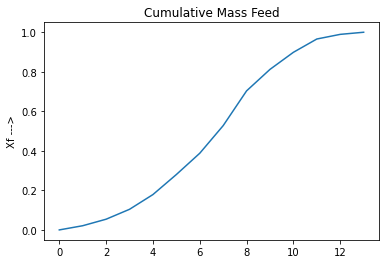

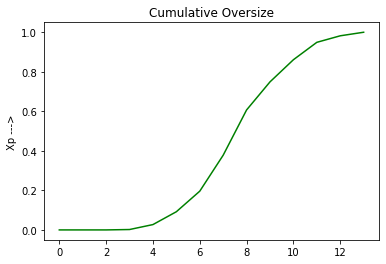

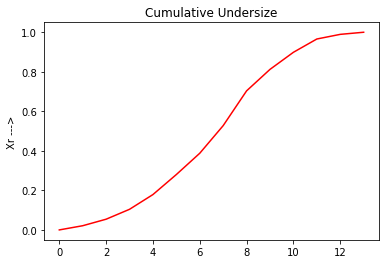

 Recovery: 111.4212 %
 Rejection: 98.0825 %
 Effectiveness: 109.2847 %



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

mass_feed=[0.0107,0.0235,0.0672,0.0864,0.1087,0.1759,0.1397,0.1077,0.1013,0.0746,0.0501,0.033,0.0212]
retained_oversize=[0.018,0.033,0.088,0.112,0.142,0.229,0.182,0.104,0.065,0.025,0.002,0,0]
retained_undersize=[0,0,0,0,0,0,0.1023,0.1195,0.2198,0.2391,0.1877,0.1427,0.0912]

def find_cummulative(retained):
  phi = [0]
  count = 0
  for i in retained[::-1]:
    temp = phi[count]+i
    phi.append(temp)
    count+=1
  return phi

phi_oversize = find_cummulative(retained_oversize)
phi_undersize = find_cummulative(retained_undersize)
phi_feed = find_cummulative(mass_feed)

data = pd.DataFrame({"Feed":phi_feed[::-1],"Xp":phi_oversize[::-1],"Xr":phi_undersize[::-1]},columns={"Feed","Xp","Xr"})
print(data,"\n")

plt.plot(phi_feed)
plt.ylabel("Xf --->")
plt.title("Cumulative Mass Feed")
plt.show()

plt.plot(phi_oversize,color="g")
plt.ylabel("Xp --->")
plt.title("Cumulative Oversize")
plt.show()

plt.plot(phi_feed,color="r")
plt.ylabel("Xr --->")
plt.title("Cumulative Undersize")
plt.show()

#Changes according to roll number
yF = 1-phi_feed[3]
yP = 1-phi_oversize[3]	
yR = 1-phi_undersize[3]

recovery=yP/yF
rejection=1-((1-yP)/(1-yF))
effectiveness=recovery*rejection
print(" Recovery:",'%.4f'%(recovery*100),"%\n","Rejection:",'%.4f'%(rejection*100),"%\n","Effectiveness:",'%.4f'%(effectiveness*100),"%\n")



```
Question-3
```



In [ ]:
import numpy as np
mass_flow = 2000/3600 #Units:kg/s
power = 8.54*746 #Units: watt
diameter_feed = 0.025 #Units: m
diameter_pdt = 0.018 #Units:m

Kk = power/(mass_flow*np.log(diameter_feed/diameter_pdt)) #kicks law constant

def kicks_law_power(Kk,diameter_feed,mass_flow,x):
  new_diameter_pdt = 2*x/1000
  return mass_flow*Kk*np.log(diameter_feed/new_diameter_pdt)
#input_x
x=7
print("Power Consumption using Kick's law:",'%4f'%kicks_law_power(Kk,diameter_feed,mass_flow,x),"Watts","(",'%4f'%(kicks_law_power(Kk,diameter_feed,mass_flow,x)/746),"HP )")

Power Consumption using Kick's law: 11244.703593 Watts ( 15.073329 HP )
